<a href="https://colab.research.google.com/github/Manishpatil7975/AIML_ASSIGNMENTS/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Coefficients:
  Avg. Area Income: 21.8920
  Avg. Area House Age: 149985.5633
  Avg. Area Number of Rooms: 105507.7527
  Avg. Area Number of Bedrooms: 8522.0958
  Area Population: 15.2291

Intercept: -2488128.6505

Evaluation Metrics:
  Mean Absolute Error (MAE): 97559.46
  Mean Squared Error (MSE): 14519364497.01
  R-squared (R²): 0.8740


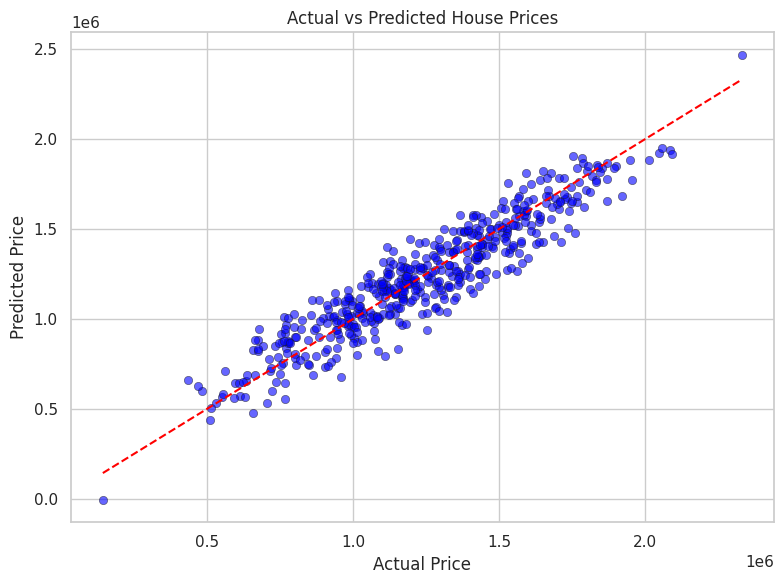

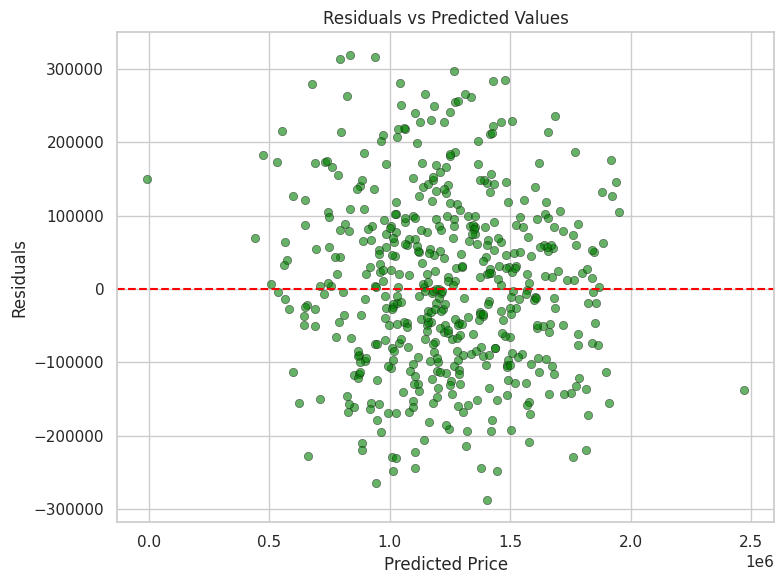

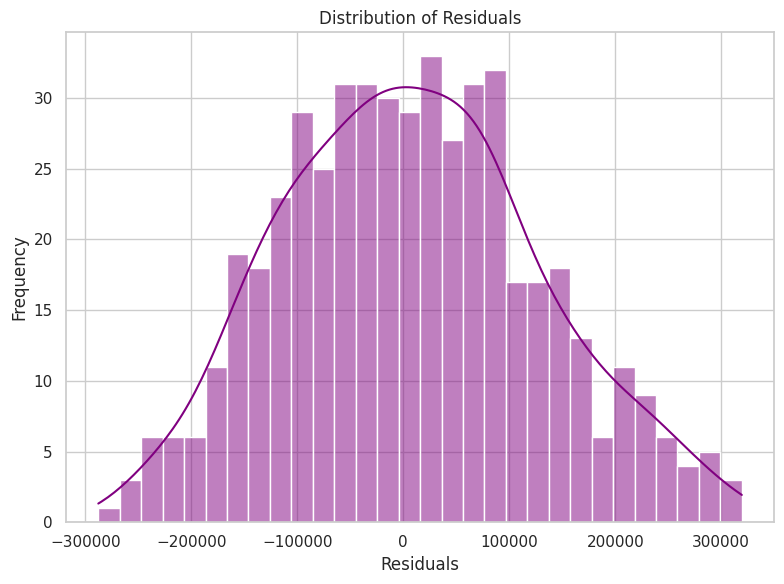

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load dataset
file_path = "/content/USA_Housing_toy (1).csv"  # Update path if needed
df = pd.read_csv(file_path)

# 2. Drop non-numeric column
df = df.drop(columns=['Address'])

# 3. Define features and target
X = df.drop(columns=['Price'])
y = df['Price']

# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Predictions
y_pred = model.predict(X_test)

# 7. Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature}: {coef:.4f}")

print(f"\nIntercept: {model.intercept_:.4f}")
print("\nEvaluation Metrics:")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  R-squared (R²): {r2:.4f}")

# 8. Visualizations
sns.set(style="whitegrid")

# Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.tight_layout()
plt.show()

# Residuals vs Predicted
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='green', edgecolor='k', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# Residual distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()